In [36]:
import numpy as np
import pandas as pd
from sklearn import tree
data = pd.read_csv(r"C:\Users\96361\iCloudDrive\数据挖掘实践-胡仕成\B\continuousData\Sampledata-continuous.CSV",encoding='GBK')

data["CUSTOMER_TYPE"] = (data["CUSTOMER_TYPE"]== "2G").astype("int")
print(data["CUSTOMER_TYPE"])

data.head()



0     1
1     1
2     0
3     0
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    0
Name: CUSTOMER_TYPE, dtype: int32


,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE
0,0.12,1,0.99,0.34,0.31,0.25,0.00,1
1,1.00,0,0.29,0.00,0.03,0.01,0.00,1
2,0.35,0,1.00,0.36,0.47,0.47,0.03,0
3,0.00,0,0.98,0.18,0.19,0.18,0.01,0
4,0.55,0,0.84,0.10,0.05,0.06,0.00,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HS_AGE          28 non-null     float64
 1   VAS_AR_FLAG     28 non-null     int64  
 2   AVG_USAGE_DAYS  28 non-null     float64
 3   AVG_BILL_AMT    28 non-null     float64
 4   AVG_MINS        28 non-null     float64
 5   AVG_CALL        28 non-null     float64
 6   AVG_VAS_GAMES   28 non-null     float64
 7   CUSTOMER_TYPE   28 non-null     int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 1.8 KB


In [38]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as TTS

data_feature_name =["HS_AGE","VAS_AR_FLAG","AVG_USAGE_DAYS","AVG_BILL_AMT","AVG_MINS","AVG_CALL","AVG_VAS_GAMES"]
data_features = data.iloc[:,:7].to_numpy()
data_target = data.iloc[:,7].to_numpy()

Xtrain, Xtest, Ytrain, Ytest = TTS(data_features, data_target, test_size=0.3, random_state=420)
print("Xtrain")
print(Xtrain)
print("Xtest")
print(Xtest)



Xtrain
[[0.35 0.   1.   0.36 0.47 0.47 0.03]
 [0.12 0.   0.79 0.04 0.04 0.04 0.02]
 [0.05 1.   0.89 0.37 0.14 0.1  0.2 ]
 [0.02 1.   0.91 0.16 0.11 0.05 0.02]
 [0.   0.   1.   0.14 0.08 0.09 0.  ]
 [0.62 0.   1.   0.28 0.22 0.21 1.  ]
 [0.03 0.   0.76 0.05 0.09 0.04 0.08]
 [0.12 1.   0.99 0.34 0.31 0.25 0.  ]
 [0.55 0.   0.84 0.1  0.05 0.06 0.  ]
 [0.   0.   0.98 0.18 0.19 0.18 0.01]
 [0.02 0.   0.46 0.04 0.08 0.02 0.  ]
 [0.33 0.   0.11 0.   0.   0.   0.  ]
 [0.32 1.   0.   0.04 0.   0.   0.  ]
 [0.   0.   0.98 0.22 0.14 0.19 0.  ]
 [0.22 1.   0.95 0.19 0.15 0.09 0.01]
 [0.   0.   0.99 0.19 0.16 0.14 0.  ]
 [0.35 1.   0.98 0.21 0.12 0.11 0.  ]
 [0.   0.   0.4  0.05 0.01 0.01 0.07]
 [0.45 0.   1.   0.16 0.15 0.15 0.04]]
Xtest
[[0.07 1.   0.71 0.19 0.08 0.09 0.1 ]
 [0.07 0.   0.53 0.11 0.02 0.01 0.25]
 [0.17 0.   0.99 0.09 0.13 0.1  0.04]
 [0.18 1.   1.   0.27 0.21 0.22 0.  ]
 [1.   0.   0.29 0.   0.03 0.01 0.  ]
 [0.57 1.   1.   1.   1.   1.   0.  ]
 [0.12 0.   0.72 0.01 0.02 0.02 0.  

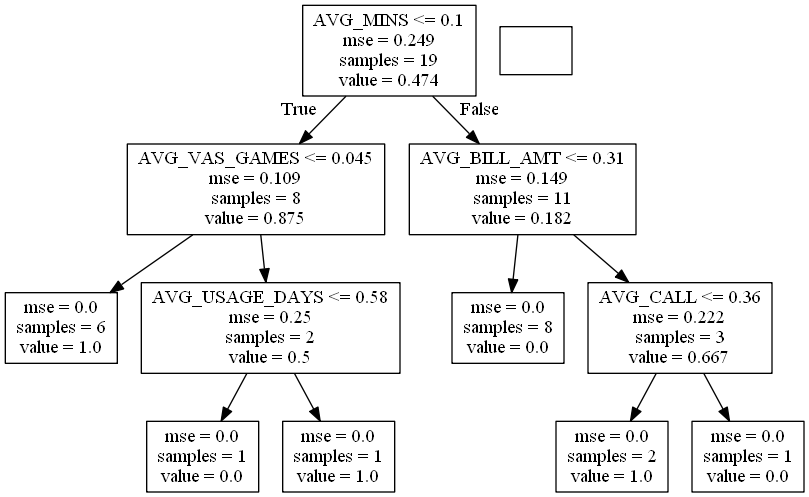

In [39]:
rgs = tree.DecisionTreeRegressor(max_depth=4)
rgs = rgs.fit(Xtrain, Ytrain)
import pydotplus
from IPython.display import Image, display
dot_data = tree.export_graphviz(rgs,
                                # out_file = None,
                                feature_names = data_feature_name,
                                class_names = data_target,
                                # filled = True,
                                # rounded = True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [40]:
CUSTOMER_TYPE_test=np.array([[0.12,0, 0.72,0.01,0.02,0.02,0]])
predict_result=rgs.predict(CUSTOMER_TYPE_test)
# 0:yes 1:no
print("==========================================")
print("测试准确率为:")
print(abs(rgs.score(Xtest, Ytest)))
print("==========================================")

测试准确率为:
1.25


In [41]:
print("==========================================")
print("测试数据[0.12,0, 0.72,0.01,0.02,0.02,0]")
if(predict_result[0]==1):
    print("分类结果CUSTOMER_TYPE=2G")
else:
    print("分类结果CUSTOMER_TYPE=3G")
print("==========================================")

测试数据[0.12,0, 0.72,0.01,0.02,0.02,0]
分类结果CUSTOMER_TYPE=2G
